In [7]:
import torch
torch.cuda.empty_cache()

# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA GeForce GTX 1650
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [8]:
import pandas as pd

df = pd.read_csv("data/dataset.csv", usecols=['text','label'])
df.head()

,text,label
0,it really is not but good to know you will bel...,1
1,indeed i will let us take a teensy fraction of...,2
2,actually its not not only have child drag been...,1
3,government considering repeal of sodomy law al...,2
4,on a clear day you can see forever opening nig...,2


In [9]:
df.shape

(19835, 2)

In [10]:
df.label.value_counts()

2    8846
1    7308
0    3681
Name: label, dtype: int64

In [11]:
import random
import numpy as np

seed_val = 17 
random.seed(seed_val) 
np.random.seed(seed_val) 
torch.manual_seed(seed_val) 
torch.cuda.manual_seed_all(seed_val)

In [12]:
from sklearn.model_selection import train_test_split

train_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['label'], 
                                                                    test_size=0.3, 
                                                                    stratify=df['label'])

# we will use temp_text and temp_labels to create validation and test set
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

In [13]:
import transformers
from transformers import AutoModel, BertTokenizerFast

# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased', return_dict=False)

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [14]:
emoji_df = pd.read_csv('emoji.csv')
emoji_list = emoji_df['emoji'].to_list()
print(emoji_list)

['™', '🙄', '✅', '💗', '😢', '🏳️\u200d🌈', '😌', '🏳', '💀', '🌈', '👏🏻', '✨', '🌟', '🌹', '😕', '⭐', '😅', '🙏', '🐒', '🧐', '😭', '🖤', '🤧', '🤣', '🗃️', '🗓️', '➡️', '🔻', '🤤', '🌐', '😁', '❤️', '❤', '👏', '😍', '👽', '🚀', '📚', '🐱', '🌌', '😩', '🤷\u200d♀️', '😬', '🦄', '🤸\u200d♀️', '☀️', '👏🏼', '🔆', '🗣', '👀', '👍🏻', '🧑\u200d🤝\u200d🧑', '🎊', '☹️', '🥰', '💖', '🤭', '👎', '🎵', '🎶', '😊', '👌🏼', '🤟🏼', '💪🏼', '🔥', '🐻', '🐺', '😂', '♥️', '🤡', '💚', '💙', '💜', '🤔', '🍹', '🍸', '👌', '🏠', '🙃', '🚫', '👇', '😆', '😀', '🤪', '🤷🏼\u200d♂️', '🥺', '📦', '🍃', '💨', '🌅', '🏝', '👬🏻', '🥵', '🧵', '😰', '💅', '👨\u200d❤️\u200d👨', '👨\u200d❤️\u200d💋\u200d👨', '😔', '😇', '🤫', '🙏🏻', '🤷\u200d♂️', '🇧🇿', '😞', '📣', '🤢', '😃', '😡', '💫', '💎', '🧛\u200d♀️', '🥀', '🎹', '™️', '😺', '🤍', '💛', '🧡', '💕', '✋', '🗽', '🎃', '🇷🇺', '🤠', '💋', '🤯', '🎩', '🧁', '🍰', '✌️', '👨', '👨🏼', '🥴', '💔', '👍', '®', '😎', '🐕', '💩', '🐨', '😉', '🐧', '👍🏾', '😳', '🥳', '🤦\u200d♀️', '👇🏽', '🔺', '🙌', '❌', '⭕', '😙', '🤦\u200d♂️', '🤦\u200d♂', '😑', '💥', '➡', '🔴', '🎮', '🚑', '⛑️', '😐', '🗣️', '💬', '😿', '😈', '😏', '💟', '▶️', '

In [15]:
vocab_df = pd.read_csv('vocab.csv')
vocab_list = vocab_df['word'].to_list()
print(vocab_list)

['2lgbtqias', '2nite', 'abbasi', 'ade', 'aku', 'atonia', 'awwww', 'bagus', 'benda', 'biden', 'bradbury', 'cee', 'chakra', 'charle', 'cosa', 'covid-19', 'cupcakke', 'elysia', 'etcnon', 'fair1', 'familia', 'fil', 'furrie', 'gc', 'georgiafreedom', 'goldwater', 'gop', 'grat', 'grt', 'gta', 'hak', 'ig', 'inb4', 'kadhi', 'kalo', 'karlsberg', 'koda', 'kulah', 'l3sbians', 'latifi', 'lgbt2', 'lgbtabc123xyz', 'lgbtq', 'lgbtq2', 'lgbtqia2', 'lgbt÷', 'looney', 'mau', 'nep', 'peele', 'ppls', 'proship', 'proshpped0', 'rated18', 'rogan', 'rostow', 'rp', 'sama', 'su1c1de', 'tabeta', 'titanbi', 'vag', 'vinny', 'visto', 'wickham', 'ww2', 'yagi', 'zahra', '新人vtuber']


In [16]:
new_tokens = emoji_list + vocab_list

num_added_toks = tokenizer.add_tokens(new_tokens)
print('We have added', num_added_toks, 'tokens')
 # Notice: resize_token_embeddings expect to receive the full size of the new vocabulary, i.e., the length of the tokenizer.
bert.resize_token_embeddings(len(tokenizer))

We have added 660 tokens


Embedding(31182, 768)

In [19]:
# sample data
text = ["this is a bert model tutorial", "we will fine-tune a bert model"]

# encode text
sent_id = tokenizer.batch_encode_plus(text, padding=True, return_token_type_ids=False)

In [20]:
# output
print(sent_id)

{'input_ids': [[101, 2023, 2003, 1037, 14324, 2944, 14924, 4818, 102, 0], [101, 2057, 2097, 2986, 1011, 8694, 1037, 14324, 2944, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


<AxesSubplot: >

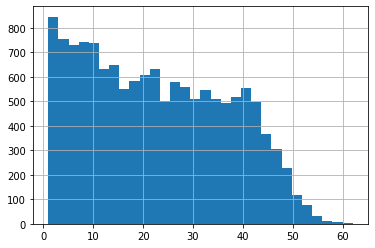

In [21]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

In [22]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    padding='longest',
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    padding='longest',
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    padding='longest',
    truncation=True,
    return_token_type_ids=False
)


In [23]:
# for train set
train_seq = torch.tensor(tokens_train['input_ids']).to(device)
train_mask = torch.tensor(tokens_train['attention_mask']).to(device)
train_y = torch.tensor(train_labels.tolist()).to(device)

# for validation set
val_seq = torch.tensor(tokens_val['input_ids']).to(device)
val_mask = torch.tensor(tokens_val['attention_mask']).to(device)
val_y = torch.tensor(val_labels.tolist()).to(device)

# for test set
test_seq = torch.tensor(tokens_test['input_ids']).to(device)
test_mask = torch.tensor(tokens_test['attention_mask']).to(device)
test_y = torch.tensor(test_labels.tolist()).to(device)

In [24]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 16

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [25]:
import torch.nn as nn

class BERT_Arch(nn.Module):

    def __init__(self, bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      # dropout layer
      self.dropout = nn.Dropout(0.1)
      
      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)
      
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,3)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      _, cls_hs = self.bert(sent_id, attention_mask=mask)
      
      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)
      
      # apply softmax activation
      x = self.softmax(x)

      return x

In [26]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [19]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-3)

c:\Users\user\anaconda3\envs\pytorch\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [20]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_wts = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)

print(class_wts)

[1.79588669 0.90478983 0.74741602]


In [21]:
# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 10

In [22]:
# function to train the model
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
 
    sent_id, mask, labels = batch

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [23]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [24]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10
  Batch    50  of    868.
  Batch   100  of    868.
  Batch   150  of    868.
  Batch   200  of    868.
  Batch   250  of    868.
  Batch   300  of    868.
  Batch   350  of    868.
  Batch   400  of    868.
  Batch   450  of    868.
  Batch   500  of    868.
  Batch   550  of    868.
  Batch   600  of    868.
  Batch   650  of    868.
  Batch   700  of    868.
  Batch   750  of    868.
  Batch   800  of    868.
  Batch   850  of    868.

Evaluating...
  Batch    50  of    186.
  Batch   100  of    186.
  Batch   150  of    186.

Training Loss: 1.117
Validation Loss: 1.098

 Epoch 2 / 10
  Batch    50  of    868.
  Batch   100  of    868.
  Batch   150  of    868.
  Batch   200  of    868.
  Batch   250  of    868.
  Batch   300  of    868.
  Batch   350  of    868.
  Batch   400  of    868.
  Batch   450  of    868.
  Batch   500  of    868.
  Batch   550  of    868.
  Batch   600  of    868.
  Batch   650  of    868.
  Batch   700  of    868.
  Batch   750  of    868.


KeyboardInterrupt: 

In [27]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [34]:
# get predictions for test data
import torch 

torch.cuda.empty_cache()

with torch.no_grad():
  preds = model(test_seq[:1].to(device), test_mask[:1].to(device))
  preds = preds.detach().cpu().numpy()

In [37]:

# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
# confusion matrix
pd.crosstab(test_y, preds)

['arts', '##y', '##7']